In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os
import json 
import struct
import random
import argparse
import seaborn as sns 


pwd=os.getcwd()
reports_path=os.path.join(pwd,"../../../FSIM_logs/resnet50-bq2ch_from_resnet50_faulty_neurons_4/")
# reports_path=os.path.join(pwd,"../../FSIM_logs/resnet50_faulty_neurons_4/")
results_path=os.path.join(pwd,"../../../FSIM_logs/try_number_one/analyze/reference")

fault_list_file=os.path.join(reports_path,"fault_list.csv")
fsim_report_file=os.path.join(reports_path,"fsim_report.csv")



fault_list= pd.read_csv(fault_list_file,index_col=[0]) 
fsim_report= pd.read_csv(fsim_report_file,index_col=[0]) 


full_report=pd.concat([fault_list,fsim_report],axis=1)




full_report['MRAD']=(100*abs(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
full_report['MRADk']=(100*abs(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])

full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))

#full_report.to_csv(os.path.join(results_path,"full_report.csv"))


   neuron_fault_rate  bit_6  bit_7  bit_8  bit_9  bit_10    bit_11  bit_12  \
0              0.005    0.0    0.0    0.0    0.0     0.0  0.002735     0.0   
1              0.015    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
2              0.025    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
3              0.035    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
4              0.045    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
5              0.055    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
6              0.065    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
7              0.075    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
8              0.085    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   
9              0.095    0.0    0.0    0.0    0.0     0.0  0.000000     0.0   

   bit_13  bit_14  ...    bit_22    bit_23    bit_24    bit_25     bit_26  \
0     0.0     0.0  ...  0.043765  0.093000  0.177790  0.506020  

<Axes: xlabel='neuron_fault_rate', ylabel='AbsAD'>

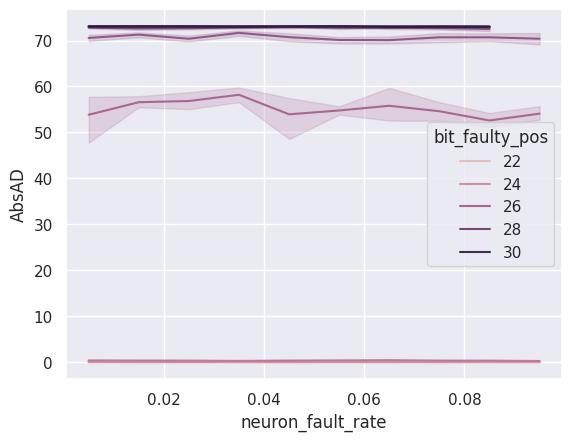

In [197]:

new_Neuron_frame=pd.DataFrame()
new_Bit_frame=pd.DataFrame()
# for Nfr in options:
grouped=full_report.groupby('neuron_fault_rate')
for name, group in grouped:
    #print(name)    
    df_neuron_fault_rate=full_report.loc[abs(full_report['neuron_fault_rate']-name)<0.00000005]
    new_row={'neuron_fault_rate':name}
    bit_groups=group.groupby('bit_faulty_pos')
    for bit, bit_group in bit_groups:
        #print(bit)
        bit_wise_data=bit_group
        if bit>5:
            new_row[f"bit_{bit}"]=bit_wise_data[['MRAD']].mean()
        
    tmp_frame=pd.DataFrame(new_row)

    new_Bit_frame=pd.concat([new_Bit_frame,tmp_frame],ignore_index=True)

#new_Bit_frame.index=new_Bit_frame['neuron_fault_rate']
#new_Bit_frame=new_Bit_frame.drop(columns=['neuron_fault_rate'])
# new_Bit_frame=new_Bit_frame[['bit_22','bit_23','bit_24','bit_25','bit_26','bit_27','bit_28','bit_29','bit_30','bit_31']]

print(new_Bit_frame)



anagrams_long = new_Bit_frame.melt(id_vars=['neuron_fault_rate'],ignore_index=False)
anagrams_long.head()
#anagrams_long.drop("neuron_fault_rate")
#print(anagrams_long)


full_report=full_report.loc[(full_report['bit_faulty_pos']>20)]

sns.set_theme()
#sns.heatmap(new_Bit_frame)
#sns.displot(data=new_Bit_frame,kind="ecdf")

#sns.lineplot(data=anagrams_long,x="variable",y='value')
#sns.lineplot(data=full_report,x="bit_faulty_pos",y='MRAD',hue='neuron_fault_rate')
sns.lineplot(data=full_report,x="neuron_fault_rate",y='AbsAD',hue='bit_faulty_pos')
#sns.histplot(data=full_report,x="MRAD",hue="neuron_fault_rate",bins=30)




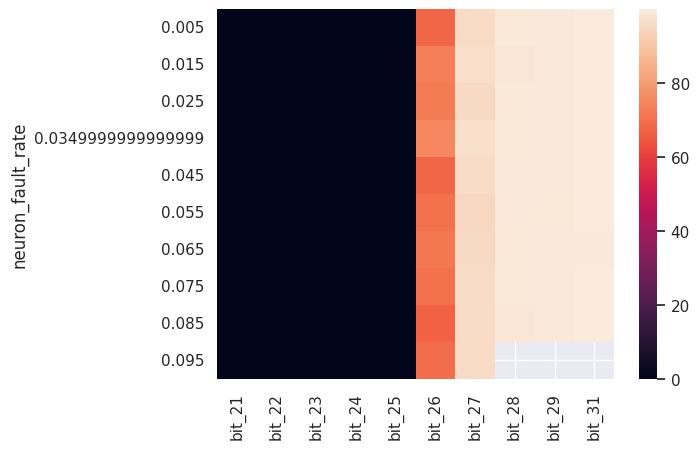

In [198]:


new_Neuron_frame=pd.DataFrame()
new_Bit_frame=pd.DataFrame()
# for Nfr in options:
grouped=full_report.groupby('neuron_fault_rate')
for name, group in grouped:
    #print(name)    
    df_neuron_fault_rate=full_report.loc[abs(full_report['neuron_fault_rate']-name)<0.00000005]
    new_row={'neuron_fault_rate':name}
    bit_groups=group.groupby('bit_faulty_pos')
    for bit, bit_group in bit_groups:
        #print(bit)
        bit_wise_data=bit_group
        if bit!=30:
            new_row[f"bit_{bit}"]=bit_wise_data[['MRADk']].mean()
        
    tmp_frame=pd.DataFrame(new_row)

    new_Bit_frame=pd.concat([new_Bit_frame,tmp_frame],ignore_index=True)

new_Bit_frame.index=new_Bit_frame['neuron_fault_rate']
new_Bit_frame=new_Bit_frame.drop(columns=['neuron_fault_rate'])
# new_Bit_frame=new_Bit_frame[['bit_22','bit_23','bit_24','bit_25','bit_26','bit_27','bit_28','bit_29','bit_30','bit_31']]




plt.figure()
sns.heatmap(new_Bit_frame)
plt.show()
